<a href="https://colab.research.google.com/github/sukainahAlramadhan/navigation-using-Turtlebot3-SLAM/blob/main/Taxi_Fare_Prediction_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚕 Taxi Fare Prediction Challenge

**Dive into the world of ride-sharing economics and build a model to predict taxi trip fares!**

This challenge leverages a realistic synthetic dataset, perfect for honing your regression skills and exploring pricing dynamics within the taxi industry.  Put your data science prowess to the test and develop a robust fare prediction model.

[![Taxi Dataset](https://img.shields.io/badge/Dataset-Kaggle-blueviolet)](https://www.kaggle.com/datasets/denkuznetz/taxi-price-prediction)


## Dataset Overview

This dataset simulates taxi trip data, incorporating key factors influencing fare calculation.  Your goal is to accurately predict the `Fare Amount` based on provided features.


## Feature Breakdown

| Feature           | Description                                     | Data Type    |
|-------------------|-------------------------------------------------|-------------|
| `Distance (km)`    | Trip length                                      | Numeric     |
| `Pickup Time`    | Trip start time                               | DateTime    |
| `Dropoff Time`   | Trip end time                                | DateTime    |
| `Traffic Condition`| Traffic level (light, medium, heavy)           | Categorical |
| `Passenger Count` | Number of passengers                           | Numeric     |
| `Weather Condition`| Weather status (clear, rain, snow)             | Categorical |
| `Trip Duration (min)` | Total trip time in minutes                    | Numeric     |
| `Fare Amount (USD)`| **Target Variable:** The cost of the trip      | Numeric     |



## Challenge Objectives

Construct a linear regression model to predict taxi fares.  Follow these steps:

1. **Data Ingestion & Exploration:**  Load the dataset and perform thorough Exploratory Data Analysis (EDA) to understand the data distribution, identify potential outliers, and uncover relationships between features.

2. **Feature Engineering:**  Craft new features from the existing ones to potentially improve model performance.  Think about time-based features (hour of day, day of week), or combined features (distance/duration).

3. **Preprocessing:**
    * **Data Cleaning:** Handle missing values, outliers, and any inconsistencies in the data.
    * **Data Splitting:** Partition the data into training and testing sets.

4. **Model Training & Evaluation:**
    * Implement linear regression models using the methods that you learned today.
    * Consider regularization techniques (LASSO, Ridge) to prevent overfitting and improve generalization.
    * Evaluate model performance using appropriate metrics (e.g., RMSE, MAE, R-squared).


##  Get Started!

Download the dataset, explore the data, and start building your predictive model! Good luck! 🚕💨

## Read the data

In [53]:
# importing libraries
import kagglehub
import pandas as pd
import os

## mine
import seaborn as sns

In [54]:
# Download the dataset from kaggle
path = kagglehub.dataset_download("denkuznetz/taxi-price-prediction")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/denkuznetz/taxi-price-prediction/versions/1


In [55]:
# Read the data using pandas
csv_path = os.path.join(path, "taxi_trip_pricing.csv")
taxiPricing = pd.read_csv(csv_path)
taxiPricing.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


## Perform Exploratory Data Analysis (EDA)



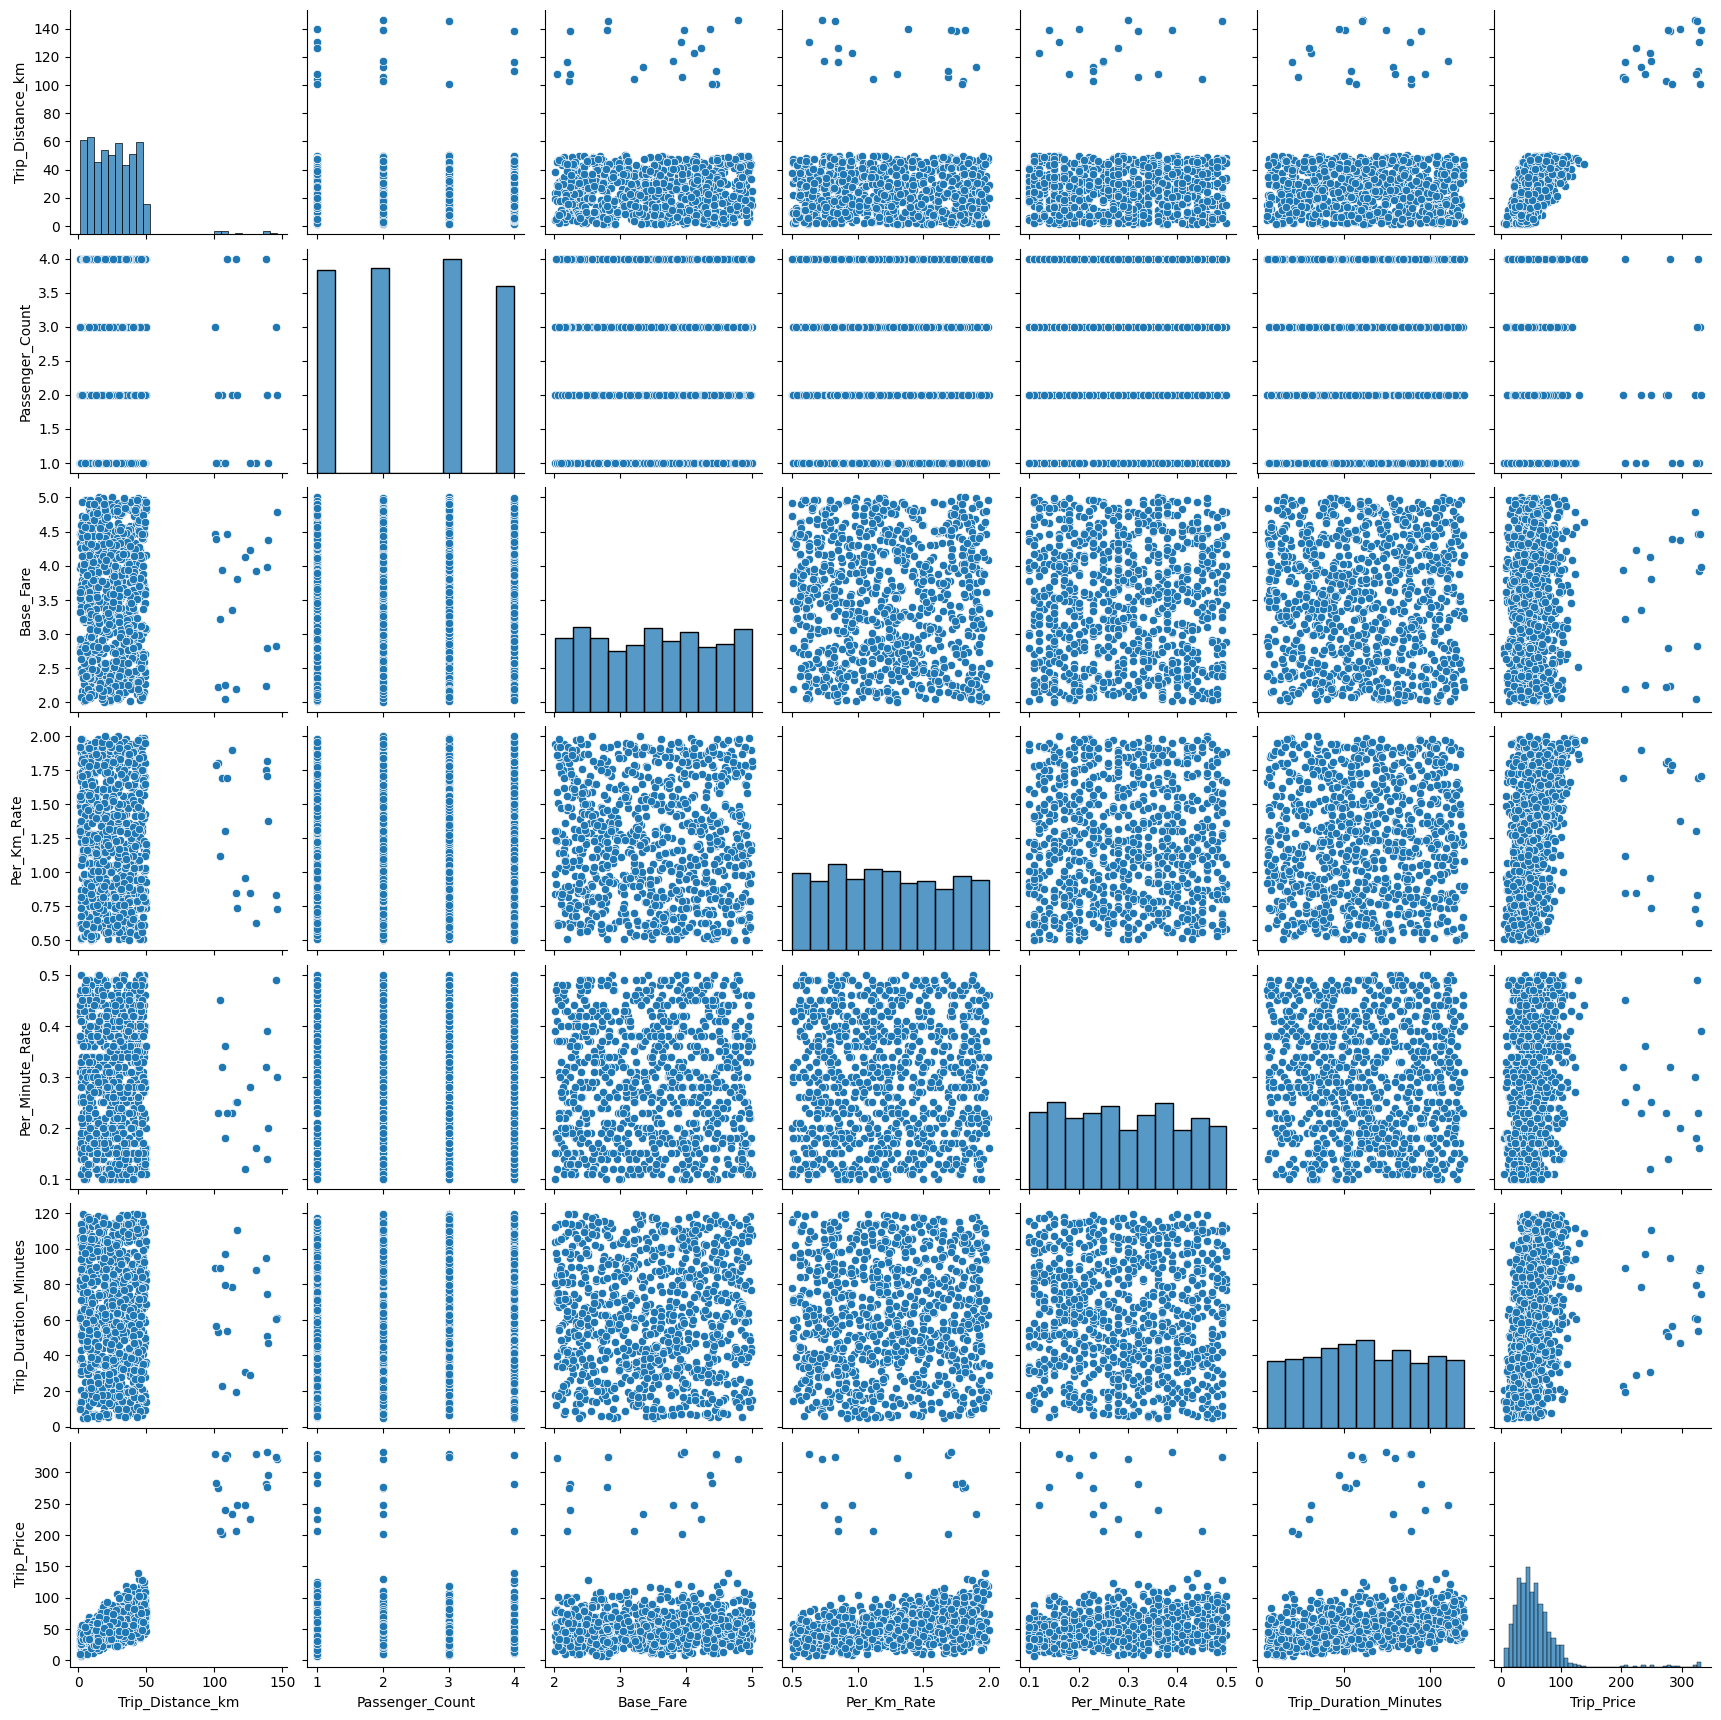

In [56]:
# Show plots and heatmaps
sns.pairplot(taxiPricing) ## to plot each feature with all other features

In [57]:
numcol = taxiPricing[["Trip_Duration_Minutes","Per_Minute_Rate","Per_Km_Rate","Base_Fare","Passenger_Count","Trip_Distance_km"]]
numcol

,Trip_Duration_Minutes,Per_Minute_Rate,Per_Km_Rate,Base_Fare,Passenger_Count,Trip_Distance_km
0,53.82,0.32,0.80,3.56,3.0,19.35
1,40.57,0.43,0.62,NaN,1.0,47.59
2,37.27,0.15,1.21,2.70,1.0,36.87
3,116.81,0.15,0.51,3.48,4.0,30.33
4,22.64,0.32,0.63,2.93,3.0,NaN
...,...,...,...,...,...,...
995,58.39,0.49,0.62,2.39,4.0,5.49
996,61.96,NaN,0.61,3.12,4.0,45.95
997,54.18,NaN,1.78,2.08,3.0,7.70
998,114.94,0.17,0.82,2.67,1.0,47.56


<Axes: >

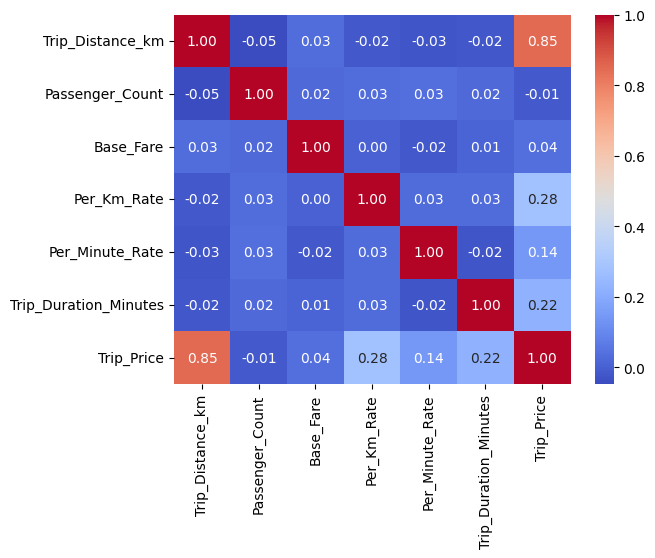

In [58]:
numcol = ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Trip_Price']

# Create a heatmap for the correlation matrix of numerical columns
sns.heatmap(taxiPricing[numcol].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0)


In [59]:
#sns.heatmap(taxiPricing[[numcol]],  annot=True)

In [60]:
# sns.heatmap(taxiPricing, columns=("Trip_Duration_Minutes","Per_Minute_Rate"), annot=True)

In [61]:
#sns.heatmap(taxiPricing.drop("Trip_Price",axis=1).corr(), annot=True) ## show correlation between features each other

## Do Feature Engineering

I did it after cleaning the data to avoid missing values

In [62]:
# Add, edit, and remove features, if applicable.
#### NEW FEATURES
  ## edit
taxiPricing["Trip_Duration_houres"] = taxiPricing["Trip_Duration_Minutes"]/60
  ## add
taxiPricing["Speed"] = taxiPricing["Trip_Distance_km"]/taxiPricing["Trip_Duration_houres"]
taxiPricing["acceleration"] = taxiPricing["Speed"]/taxiPricing["Trip_Duration_houres"]

## Preprocess the data

In [63]:
# Show missing values, clean the data, split it to train and test sets
#taxiPricing = taxiPricing.drop("Trip_Price",axis=1) ## dont change target
#USAhousing ## data after deleting target
print(taxiPricing.head())

#### MISSING VALUES
missvals = taxiPricing.isnull().sum()
print("Missing values in each column:")
print(missvals)

  ## drop all
taxiPricing = taxiPricing.dropna(subset=['Trip_Distance_km',"Time_of_Day","Day_of_Week","Trip_Duration_houres", "Trip_Price"])

  ## mode
taxiPricing['Passenger_Count'] = taxiPricing['Passenger_Count'].fillna(taxiPricing['Passenger_Count'].mode()[0])
taxiPricing['Traffic_Conditions'] = taxiPricing['Traffic_Conditions'].fillna(taxiPricing['Traffic_Conditions'].mode()[0])
taxiPricing['Weather'] = taxiPricing['Weather'].fillna(taxiPricing['Weather'].mode()[0])

  ## mean
meancol= ['Base_Fare',"Per_Km_Rate","Per_Minute_Rate"]
taxiPricing[meancol] = taxiPricing[meancol].fillna(taxiPricing[meancol].mean())

  ## finding missing data from available (Trip_Duration_Minutes = Trip_Price/Per_Minute_Rate)
#taxiPricing["Trip_Duration_Minutes"] = taxiPricing["Trip_Duration_Minutes"].fillna(taxiPricing["Trip_Price"]/taxiPricing["Per_Minute_Rate"])

  ## finding missing data from available ( Trip_Price= Trip_Duration_Minutes*Per_Minute_Rate)
#taxiPricing["Trip_Price"] = taxiPricing["Trip_Price"].fillna(taxiPricing["Trip_Duration_Minutes"]*taxiPricing["Per_Minute_Rate"])
    ## drop the 3 samples that has null even after the privus line
#taxiPricing =taxiPricing.dropna(subset=["Trip_Price"])




   Trip_Distance_km Time_of_Day Day_of_Week  Passenger_Count  \
0             19.35     Morning     Weekday              3.0   
1             47.59   Afternoon     Weekday              1.0   
2             36.87     Evening     Weekend              1.0   
3             30.33     Evening     Weekday              4.0   
4               NaN     Evening     Weekday              3.0   

  Traffic_Conditions Weather  Base_Fare  Per_Km_Rate  Per_Minute_Rate  \
0                Low   Clear       3.56         0.80             0.32   
1               High   Clear        NaN         0.62             0.43   
2               High   Clear       2.70         1.21             0.15   
3                Low     NaN       3.48         0.51             0.15   
4               High   Clear       2.93         0.63             0.32   

   Trip_Duration_Minutes  Trip_Price  Trip_Duration_houres      Speed  \
0                  53.82     36.2624              0.897000  21.571906   
1                  40.57      

<ipython-input-63-866b446dace5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxiPricing['Passenger_Count'] = taxiPricing['Passenger_Count'].fillna(taxiPricing['Passenger_Count'].mode()[0])
<ipython-input-63-866b446dace5>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxiPricing['Traffic_Conditions'] = taxiPricing['Traffic_Conditions'].fillna(taxiPricing['Traffic_Conditions'].mode()[0])
<ipython-input-63-866b446dace5>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

In [64]:
newmiss = taxiPricing.isnull().sum()
print("Missing values in each column:")
print(newmiss)

Missing values in each column:
Trip_Distance_km         0
Time_of_Day              0
Day_of_Week              0
Passenger_Count          0
Traffic_Conditions       0
Weather                  0
Base_Fare                0
Per_Km_Rate              0
Per_Minute_Rate          0
Trip_Duration_Minutes    0
Trip_Price               0
Trip_Duration_houres     0
Speed                    0
acceleration             0
dtype: int64


## Train regression models

In [65]:
obj = taxiPricing.select_dtypes('object')
obj

,Time_of_Day,Day_of_Week,Traffic_Conditions,Weather
0,Morning,Weekday,Low,Clear
2,Evening,Weekend,High,Clear
3,Evening,Weekday,Low,Clear
5,Afternoon,Weekend,Medium,Clear
6,Afternoon,Weekday,High,Rain
...,...,...,...,...
995,Afternoon,Weekend,Medium,Clear
996,Night,Weekday,Medium,Clear
997,Morning,Weekday,Low,Rain
998,Morning,Weekday,Low,Clear


In [66]:
# Fit the data in your models and evaluate them.
# Apply the techniques you learned today, including implementation using only NumPy and implementation using sklearn.
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

## Convert Categorical data to numerical
# Initialize the LabelEncoder
label_encoder = LabelEncoder() ## randomly assign a numbeer to each City/Town

# Fit and transform the City/Town column
for i in obj:
  taxiPricing[i] = label_encoder.fit_transform(taxiPricing[i])
taxiPricing

## MinMaxScaler
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# We want to scale all the columns, BUT NOT THE TARGET AND I remove it before
#cols = taxiPricing.columns.drop("Trip_Price") # Ask the students why? ## beccause we dont want it to between 0 and 1 because we will loose the significant of it???
cols = taxiPricing.columns
# Fit and transform the City/Town column
taxiPricing[cols] = scaler.fit_transform(taxiPricing[cols])
taxiPricing

X = taxiPricing.drop("Trip_Price",axis=1)
y = taxiPricing['Trip_Price']

print(y)

0      0.092464
2      0.143522
3      0.093100
5      0.165919
6      0.015764
         ...   
995    0.086764
996    0.171831
997    0.082833
998    0.169007
999    0.120634
Name: Trip_Price, Length: 772, dtype: float64


<ipython-input-66-0327bf22f55a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxiPricing[i] = label_encoder.fit_transform(taxiPricing[i])
<ipython-input-66-0327bf22f55a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxiPricing[i] = label_encoder.fit_transform(taxiPricing[i])
<ipython-input-66-0327bf22f55a>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [69]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=10, positive=True, max_iter=10000),
    "LASSO Regression": Lasso(alpha=100, positive=True, max_iter=10000)
}

for model_name, model in models.items():
    scores_mae = []
    scores_rmse = []

    # 5-Fold cross-validation
    for train_index, test_index in KFold(n_splits=5).split(X, y):
        # Split data into training and testing sets
        X_Train, X_Test = X.iloc[train_index,:], X.iloc [test_index,:]
        y_Train, y_Test = y.iloc[train_index], y.iloc[test_index]
        # Train the model
        model.fit(X_Train, y_Train)
        # Predict on the test set
        y_pred = model.predict(X_Test)
        # Calculate metrics
        scores_mae.append(mean_absolute_error(y_Test, y_pred))
        scores_rmse.append(np.sqrt(mean_squared_error(y_Test, y_pred)))
    # Print the results
    print(f"{model_name} MAE Score: {np.mean(scores_mae)}")
    print(f"{model_name} RMSE Score: {np.mean(scores_rmse)}\n")

Linear Regression MAE Score: 0.030163753254928306
Linear Regression RMSE Score: 0.04634404935987631

Ridge Regression MAE Score: 0.031551386637683476
Ridge Regression RMSE Score: 0.06609715089123312

LASSO Regression MAE Score: 0.07704589122117925
LASSO Regression RMSE Score: 0.12655854168449976



This challenge is made by [Ali Alqutayfi](https://www.linkedin.com/in/ali-alqutayfi/).